# <center> 1차 크롤링 - <워크넷> </center>

### 1차 크롤링 컬럼명
- 기업이름
- 기업위치
- 고용형태
- 필요역량
- 기업별 카테고리
- url

In [1]:
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By 
from tqdm import tqdm
import time 
import requests 

options = webdriver.ChromeOptions()

prefs = {'download.default_diretory':'/Users/kkyu/amr_ws/eda/data',
         'download.prompt_for_download':False}
options.add_experimental_option('prefs', prefs)

url = "https://www.work.go.kr/seekWantedMain.do"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
                          options = options)
driver.implicitly_wait(1)
driver.get(url)

time.sleep(3)

NoSuchDriverException: Message: Unable to locate or obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [407]:
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By

search_tag = driver.find_element(By.XPATH, '''//*[@id="topQuery"]''')
action = ActionChains(driver)
action.click(search_tag)
action.perform()

In [408]:
from selenium.webdriver.common.keys import Keys 

search_doc = driver.find_element(By.CSS_SELECTOR, "#topQuery")
search_doc.send_keys('자율주행')

In [409]:
search_doc.send_keys(Keys.ENTER)

In [410]:
search_detail = driver.find_element(By.XPATH, '''//*[@id="contents"]/div[2]/div[1]/div[1]/div[3]/div[1]/div[1]/a''')
search_detail.click()

In [411]:
# 지역별 선택(서울,경기)
area = driver.find_element(By.CSS_SELECTOR, '#jobCatelocation01Open')
area.click()

In [412]:
# 서울
area_seoul = driver.find_element(By.CSS_SELECTOR, '#regionOn_11000 > button')
area_seoul.click()

In [413]:
# 서울 전체
area_seoul_all = driver.find_element(By.CSS_SELECTOR, '#subRegion-1')
area_seoul_all.click()

In [415]:
# 경기
area_kki = driver.find_element(By.CSS_SELECTOR, '#regionOn_41000 > button')
area_kki.click()

In [416]:
# 경기 전체
area_kki_all = driver.find_element(By.CSS_SELECTOR, '#subRegion-1')
area_kki_all.click()

In [417]:
search_all = driver.find_element(By.XPATH, '''//*[@id="srcFrm"]/div[3]/div[4]/button''')
search_all.click()

### 첫번째 기업에 대한 정보를 임의로 가져와서 확인해보기

- 각 기업마다의 source에 대해 규칙성 찾기
- but 사이트마다 규칙이 있는 경우도 있고 없는 경우도 있기 때문에 반복문을 활용하면 에러가 났음
- 따라서 일부 구간에는 반복문으로 처리하였고 일부 기업에 대해서는 append 형식으로 데이터 프레임에 추가하고 이 과정을 반복하였음

In [418]:
# 첫번째 기업 정보 가져오기
body1 = driver.find_element(By.CSS_SELECTOR, '#mForm > div.table-wrap > table > tbody')
# 이름 가져오기
name = body1.find_element(By.CSS_SELECTOR, '#list1 > td:nth-child(2) > a')
# 고용 형태
kind_of = body1.find_element(By.CSS_SELECTOR, '#list1 > td:nth-child(3) > div > p:nth-child(3) > em:nth-child(1)')
# 연봉
salary = body1.find_element(By.CSS_SELECTOR, '#list1 > td:nth-child(4) > div > p:nth-child(1) > strong')
# 필요역량
education = body1.find_element(By.CSS_SELECTOR, '#list1 > td:nth-child(3) > div > p:nth-child(3) > em:nth-child(2)')
# 기업별 카테고리(라벨링)
labeling = body1.find_element(By.CSS_SELECTOR, '#jobContLine1')
# url(세부정보 들어가기)
url_ep = body1.find_element(By.CSS_SELECTOR, '#list1 > td:nth-child(3) > div > div > a')
url = url_ep.get_attribute('href')

name.text, kind_of.text, salary.text, education.text, labeling.text, url





('㈜시스윈로보틱스',
 '신입/경력',
 '회사내규에 따름',
 '고졸',
 '담당업무 : 소프트웨어개발자,앱개발자,설계엔지니어,설비엔지니어,반도체엔지니어,IT·기술영업,필드엔지니어,기계엔지니어,R&D·연구원',
 'https://www.work.go.kr/empInfo/empInfoSrch/detail/retrivePriEmpDtlView.do?searchInfoType=CJK&iorgGbcd=CJK&callPage=detail&wantedAuthNo=46186339&rtnTarget=list1&pageIndex=1&rtnUrl=/empInfo/empInfoSrch/list/dtlEmpSrchList.do?len=0&srcKeyword=%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89&regionArr=[Ljava.lang.String;@205a690e&pageSize=10&firstIndex=1&lastIndex=1&recordCountPerPage=10&academicGbnoEdu=noEdu&region=11000|41000&siteClcd=all&benefitSrchAndOr=O&areaRegion=11000&areaArc=1&staAreaLineInfo1=11000&staAreaLineInfo2=1&codeDepth1Info=11000&codeDepth2Info=11000&listCookieInfo=DTL&srchJobNum=0&resultCntInfo=10&sortOrderByInfo=DESC&sortFieldInfo=DATE&empTpGbcd=1|2&sortField=DATE&sortOrderBy=DESC&resultCnt=10&keyword=%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89&enterPriseGbn=all&termSearchGbn=all&&onlyTitleSrchYn=N&cloTermSearchGbn=all')

### 예시 (반복문 사용 불가)

In [ ]:
import pandas as pd 

# 세번째 기업 정보 가져오기
body1 = driver.find_element(By.CSS_SELECTOR, '#mForm > div.table-wrap > table > tbody')
# 이름 가져오기
name = body1.find_element(By.CSS_SELECTOR, '#list3 > td:nth-child(2)')
# 연봉
salary = body1.find_element(By.CSS_SELECTOR, '#list3 > td:nth-child(4) > div > p:nth-child(1) > strong')
# url(세부정보 들어가기)
url_ep = body1.find_element(By.CSS_SELECTOR, '#list3 > td:nth-child(3) > div > div > a')
url = url_ep.get_attribute('href')

# 새로운 기업 정보를 딕셔너리로 저장
new_company_data = {
    '이름': [name.text.split('\n')[0]],
    '연봉': [salary.text],
    'URL': [url]
}

# 새로운 기업 정보를 데이터프레임에 추가
df = pd.concat([df, pd.DataFrame(new_company_data)], ignore_index=True)
df


### 예시 (반복문 사용 가능)
- 규칙성이 있음


In [ ]:
# 네 번째 기업 정보 가져오기
name = body1.find_element(By.CSS_SELECTOR, '#list4 > td:nth-child(2) > a')
kind_of = body1.find_element(By.CSS_SELECTOR, '#list4 > td:nth-child(3) > div > p:nth-child(3) > em:nth-child(1)')
salary = body1.find_element(By.CSS_SELECTOR, '#list4 > td:nth-child(4) > div > p:nth-child(1)')
education = body1.find_element(By.CSS_SELECTOR, '#list4 > td:nth-child(3) > div > p:nth-child(3) > em:nth-child(2)')
labeling = body1.find_element(By.CSS_SELECTOR, '#jobContLine4')
url_ep = body1.find_element(By.CSS_SELECTOR, '#list4 > td:nth-child(3) > div > div > a')
url = url_ep.get_attribute('href')

# 새로운 기업 정보를 딕셔너리로 저장
new_company_data = {
    '이름': [name.text],
    '고용형태': [kind_of.text],
    '연봉': [salary.text],
    '필요역량': [education.text],
    '라벨링': [labeling.text],
    'URL': [url]
}

# 새로운 기업 정보를 데이터프레임에 추가
df = pd.concat([df, pd.DataFrame(new_company_data)], ignore_index=True)

In [197]:
# 다음 페이지 넘어가기
next_page = driver.find_element(By.CSS_SELECTOR, '#mForm > div.nav_wrp > nav > a:nth-child(2)')
next_page.send_keys(Keys.ENTER)


### 정보들을 조합하여 데이터 수집 및 재분석

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.keys import Keys 
import pandas as pd 
import time

name = []
kind_of = []
salary = []
education = []
labeling = []
url = []

for j in range(1,4):

    next_page = driver.find_element(By.CSS_SELECTOR, f'#mForm > div.nav_wrp > nav > a:nth-child({j})')
    next_page.click()
    
    time.sleep(5)
    
    body1 = driver.find_element(By.CSS_SELECTOR, '#mForm > div.table-wrap > table > tbody')

    for i in range(1,11):
        selector_name = f'#list{i} > td:nth-child(2) > a'
        selector_kind_of = f'#list{i} > td:nth-child(3) > div > p:nth-child(3) > em:nth-child(1)'
        selector_salary = f'#list{i} > td:nth-child(4) > div > p:nth-child(1) > strong'
        selector_education = f'#list{i} > td:nth-child(3) > div > p:nth-child(3) > em:nth-child(2)'
        selector_labeling = f'#jobContLine{i}'
        selector_url = f'#list{i} > td:nth-child(3) > div > div > a'
             
        name_element = body1.find_element(By.CSS_SELECTOR, selector_name)
        kind_of_element = body1.find_element(By.CSS_SELECTOR, selector_kind_of)
        salary_element = body1.find_element(By.CSS_SELECTOR, selector_salary)
        education_element = body1.find_element(By.CSS_SELECTOR, selector_education)
        labeling_element = body1.find_element(By.CSS_SELECTOR, selector_labeling)
        url_ele = body1.find_element(By.CSS_SELECTOR, selector_url)
        url_element = url_ele.get_attribute('href')
        
        if name_element and kind_of_element and salary_element and education_element and labeling_element and url_element:
            name.append(name_element.text)
            kind_of.append(kind_of_element.text)
            salary.append(kind_of_element.text)
            education.append(kind_of_element.text)    
            labeling.append(labeling_element.text)
            url.append(url_element)
            
            time.sleep(3)


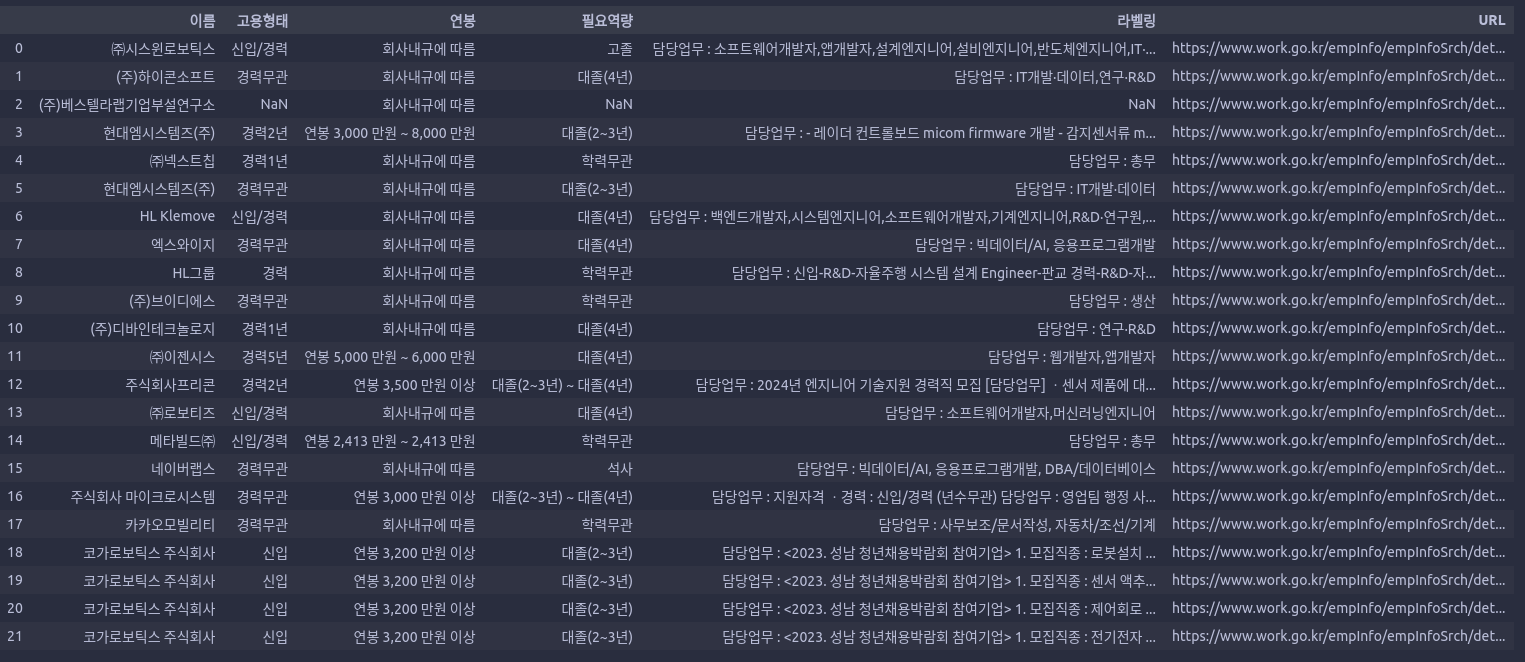

In [461]:
driver.quit()

In [2]:
import pandas as pd 

df = pd.read_csv("../data/autonomous2.csv")
df.head()

,Unnamed: 0,기업이름,기업위치,고용형태,필요역량,담당업무,연봉,기업별 카테고리,URL
0,0,㈜시스윈로보틱스,경기 화성시,신입/경력,고졸,"소프트웨어개발자,앱개발자,설계엔지니어,설비엔지니어,반도체엔지니어,IT·기술영업,필드...",회사내규에 따름,자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
1,1,(주)하이콘소프트,서울 강서구,경력무관,대졸(4년),"IT개발·데이터,연구·R&D",회사내규에 따름,자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
2,2,(주)베스텔라랩기업부설연구소,NaN,NaN,NaN,NaN,회사내규에 따름,자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
3,3,현대엠시스템즈(주),경기도 수원시 영통구,경력2년,대졸(2~3년),- 레이더 컨트롤보드 micom firmware 개발 - 감지센서류 micom fi...,"연봉 3,000 만원 ~ 8,000 만원",자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
4,4,㈜넥스트칩,경기 성남시 분당구,경력1년,학력무관,총무,회사내규에 따름,자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,기업이름,기업위치,고용형태,필요역량,담당업무,연봉,기업별 카테고리,URL
0,㈜시스윈로보틱스,경기 화성시,신입/경력,고졸,"소프트웨어개발자,앱개발자,설계엔지니어,설비엔지니어,반도체엔지니어,IT·기술영업,필드...",회사내규에 따름,자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
1,(주)하이콘소프트,서울 강서구,경력무관,대졸(4년),"IT개발·데이터,연구·R&D",회사내규에 따름,자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
2,(주)베스텔라랩기업부설연구소,NaN,NaN,NaN,NaN,회사내규에 따름,자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
3,현대엠시스템즈(주),경기도 수원시 영통구,경력2년,대졸(2~3년),- 레이더 컨트롤보드 micom firmware 개발 - 감지센서류 micom fi...,"연봉 3,000 만원 ~ 8,000 만원",자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
4,㈜넥스트칩,경기 성남시 분당구,경력1년,학력무관,총무,회사내규에 따름,자율주행,https://www.work.go.kr/empInfo/empInfoSrch/det...
